## Time Series Techniques We Should Know

### What is Time Series?

A **Time Series** is a sequence of data points collected or recorded at regular intervals over time. The data is typically sequential and chronologically ordered.  
Example:  

1. Daily temperature readings.
2. Monthly sales of a product.
3. Stock market prices captured hourly or daily.

Time Series data is unique because its values are influenced by the **order** in which they occur, making **time** a critical variable in analysis.

### What does Time Series Solve?
Time Series addresses problems where understanding or predicting patterns over time is essential. It can be used to:

1. **Understand historical patterns**:
    1. Detect trends, seasonality, and cyclical behaviors in the data.
    2. **Example:** Analyzing a store's sales over serveral years to identify peak seasons.

2. **Forecast the Future**:
    1. Generate predictions based on past trends and patterns.
    2. **Example:** Forecasting demand for electricity based on historical usage.

3. **Detect Anomalies**:
    1. Identify unusual or unexpected events in the sequence.
    2. **Example:** Spotting fraudulent activity in transaction data.

4. **Understand Dependencies Over Time**:
    1. Explore how past values influence future values.
    2. **Example:** Studying how today's stock prices relate to yesterday's.

### Where is Time Series Analysis Used?
1. **Finance**: Predicting stock prices, interest rates, and currency values.
2. **Retail**: Forecasting demand for inventory management and supply chain optimization.
3. **Healthcare**: Monitoring patient vitals or predicting disease trends.
4. **Weather and Climate**: Forecasting temperatures, rainfall, or global climate patterns.
5. **Manufacturing**: Monitoring equipment for predictive maintenance and anomaly detection.
6. **Economics**: Modelling GDP growth, unemployment rates, or inflation over time.
7. **Energy**: Forecasting energy consumption or production.

### Why should Time Series be used?
1. **Extracting Insights**
    1. Understand how and why data changes over time.
    2. **Example:** A retailer can learn how promotions influence weekly sales trends.

2. **Data-Driven Decisions**
    1. Enable informed planning based on forecasted trends.
    2. **Example:** Budgeting based on projected revenue trends.

3. **Mitigating Risks**
    1. Anticipate issues like supply shortages or system failures.
    2. **Example:** Predicting a machine breakdown using sensor data trends.

4. **Improving Efficiency**
    1. Optimize operations by predicting demands or resource needs.
    2. **Example:** Adjusting staffing levels based on forecasted customer footfall.

In [1]:
import pandas as pd

In [3]:
dataset = pd.read_csv("Dataset/Netflix-Subscriptions.csv")

In [4]:
dataset.head()

,Time Period,Subscribers
0,01/04/2013,34240000
1,01/07/2013,35640000
2,01/10/2013,38010000
3,01/01/2014,41430000
4,01/04/2014,46130000


In [5]:
# Converting 'Time Period' to datetime
dataset['Time Period'] = pd.to_datetime(dataset['Time Period'])

In [6]:
# Set the 'Time Period' as the index
dataset.set_index('Time Period', inplace=True)

In [7]:
dataset.head()

,Subscribers
Time Period,
2013-01-04,34240000
2013-01-07,35640000
2013-01-10,38010000
2014-01-01,41430000
2014-01-04,46130000


### Time Series Decomposition

Time Series Decomposition is a technique that breaks down a time series into **distinct components** to better understand its structure. 

1. **Trend (T):**
    1. The long-term direction in the data.
    2. **Example:** A steady increase in sales over years.

2. **Seasonality (S):**
    1. Regular, repeating patterns occurring at fixed intervals (e.g. daily, monthly, yearly)
    2. **Example:** Ice cream sales peaking every summer.

3. **Residual or Noise (R):**
    1. The random, unpredictable variations that cannot be explained by trend or seasonality.
    2. **Example:** Sudden sales spikes due to unexpected events.

Sometimes, **an optional cyclical component** is also considered:
    1. **Cycliality:** Long-term fluctuations that don't have a fixed period but occur due to economic or external factors.
    2. **Example:** Economic booms and recessions.

Decomposition assumes the time series follows one of these models:
1. **Additive Model:** 
2. $Y_i = T_i + S_t + R_t$ Used when the variations in seasonality and noise are **constant** in magnitude.

2. **Multiplicative Model:**
2. $Y_t = T_t * S_t * R_t$ Used when the variations in seasonality and noise **increase** or **decrease** with the trend.

### What does decomposition solve?
1. **Understand Patterns:**
    1. It helps identify the underlying trend, seasonal effects, and random noise separetly.
    2. **Example:** A retailer can isolate the effect of Black Friday sales from long-term growth trends.

2. **Prepares data for modelling:**
    1. By removing seasonality and trends, decomposition helps create a stationary time series, which is essential for many forecasting models.

3. **Improves forecasting accuarcy:**
    1. Isolating components like seasonality and trends allows for more precise predictions.

4. **Anomaly Detection:**
    1. Once the trend and seasonality are modeled, deviations (residuals) can highlight anomalies or unexpected events.

### Why should decomposition be used?
1. **Simplifying complex data:** Breaking down the series into components makes it easier to interpret.
2. **Identifying key influences:** Pinpointing trends or seasonal patterns help businesses make informed decisions.
3. **Refining forecasting models:** Models that separately handle trends and seasonality often outperform those that don't.
3. **Preparing for advanced techniques:** Many times series methods (e.g. ARIMA) require stationary data, which decomposition helps achieve.

### When should decomposition be used?
1. **When the series shows seasonality:** If the data exhibits repeating patterns (monthly sales.)
2. **For data exploration**
3. **Before Forecasting:** To remove trend and seasonality, enabling better predictions.
4. **To identify anomalies**
5. **To preprocess data**

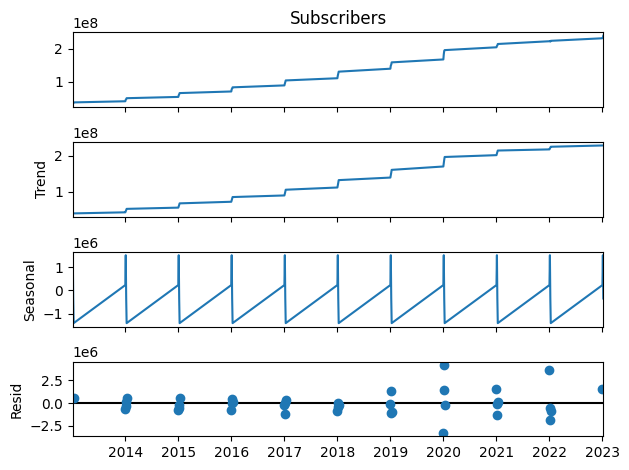

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# decomposing the TS
decomposition = sm.tsa.seasonal_decompose(dataset['Subscribers'], model='additive', period=4)
decomposition.plot()
plt.show()

"""
sm.tsa.seasonal_decompose: A function in the statsmodels library that decomposes the time series into components.

model='additive': Specifies the decomposition model as additive. This means the time series is assumed to follow, Y(t) = T(t) + S(t) + R(t)

period=4: Indicates the seasonal period (number of observations per cycle).

The code breaks down the time series into:
    
    Trend(T{t}): Long-term changes in the data.

    Seasonality (S{t}): Repeating patterns over the specified period.

    Residual (R{t}): Random noise or unexplained variations.
"""

### Moving averages and Smoothing in Time Series
1. **Moving Averages (MA):**
    * A simple technique that smooths time series data by averaging a fixed number of consecutive observations. This "moving" operation reduces noise and helps reveal the underlying trend.

2. **Smoothing:**
    * A broader concept that includes techniques (like moving averages, exponential smoothing, etc.) to reduce randomness in the data, making patterns (like trends or seasonality) more visible.

Both methods are used to highlight long-term trends while minimizing short-term fluctuations or irregularities.

#### What does Moving Average solve?
1. **Denoising:** 
    * Reduces noise to identify the central tendency of the data.   
    **Example:** A retailer analyzing daily sales might smooth data to identify an upward sales trend.

2. **Trend Detection:**
    * Extracts the trend in the time series by eliminating erratic behavior caused by outliers or random variations.

3. **Forecasting:**
    * Predicts the next value(s) by averaging recent observations (common in statistical models like ARIMA).

#### Types of Moving Averages:
1. **Simple Moving Average (SMA):** The unweighted mean of the last k observations.  
$$SMA_t = \frac{1}{k} \sum_{i=0}^{k=1} Y_{t-i}$$
**Example:** A 3-day SMA for sales: $$SMA_t = \frac{1}{3} (Sales_t + Sales_{t - 1} + Sales_{t - 2})$$

2. **Weighted Moving Average (WMA):** Assigns weights to observations, with more recent values typically given higher weights.

3. **Exponential Moving Average (EMA):** Applies exponential weights to observations, focusing more on recent data points. $$EMA_t = \alpha Y_t + (1 - \alpha) EMA_{t - 1}$$
$\alpha$ Smoothing factor ($0 < \alpha < 1$).

#### Why use Smoothing in ML?
1. **Data Preparation:**
    * Smoothing helps remove noise, making patterns more apparent for ML models (like LSTMs or Random Forests).

2. **Feature Engineering:**
    * Smoothed data can be used as an additional feature to capture trends.

3. **Regularization:**
    * It helps avoid overfitting by reducing data complexity before model training.

#### Exponential Smoothing Techniques (Holt-Winters):
1. **Single Exponential Smoothing:** Assumes no trend or seasonality.
2. **Double Exponential Smoothing:** Captures trends.
3. **Triple Exponential Smoothing:** (Holt-Winters): Captures trends and seasonality.

#### Why Use Moving Averages?
1. **Noise Reduction:** Essential when data contains high variability.
2. **Pattern Recognition:** Helps reveal trends and seasonality.
3. **Simplification:** Makes complex data more interpretable.
4. **Forecasting Models:** Acts as a baseline technique or preprocessing for statistical/ML forecasting.

#### When to Use Moving Averages?
1. **Exploratory Data Analysis (EDA):** To understand trends before building models.
2. **Time Series Forecasting:** As a benchmark or preprocessing step.
3. **Anomaly Detection:** Smooth data to highlight deviations.
4. **Short-Term Forecasting:** When you need quick, interpretable predictions.